In [1]:
from BIDMC_Preprocess import *

split_wave(
    input_csv=r"D:\桌面\ENG573\data\BIDMC\bidmc_csv\bidmc_05_Signals.csv",
    output_dir=r"D:\桌面\ENG573\data\BIDMC_Split\05")

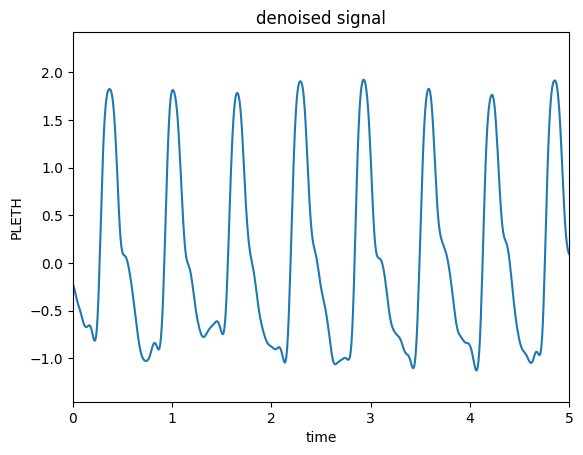

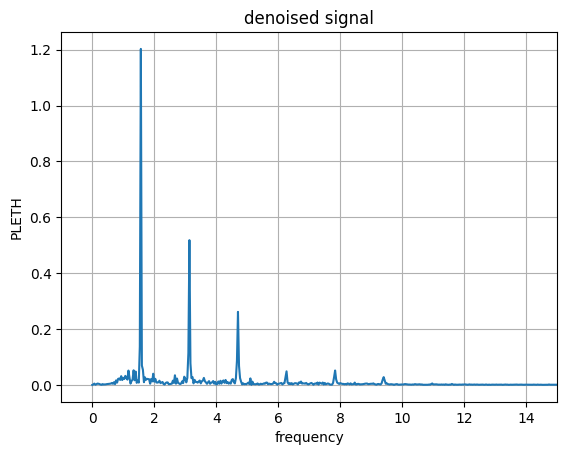

In [9]:
from BIDMC_Preprocess import *

path = r"D:\桌面\ENG573\data\BIDMC_Split\01\seg_0.csv"
denoised_path = r"D:\桌面\ENG573\data\BIDMC_Denoised\01\seg_0_d.csv"
df = pd.read_csv(path)
t = df['Time [s]']
PLETH = df[' PLETH']
frequency = 125

df_d = pd.read_csv(denoised_path)
PLETH_d = df_d[' PLETH']
wave_visualize(t,PLETH_d,"Normalized denoised signal", duration=5)
# compare_in_t(t, PLETH-np.mean(PLETH), "raw signal without DC", PLETH_d, "deMA signal",duration=30)

In [5]:

# butter_filtered = butter_filter(PLETH)
# VMD_filtered = VMD_deMA(butter_filtered)
# wave_visualize(t,PLETH,"raw signal",duration=10)
# wave_visualize(t,butter_filtered,"lowpass filtered signal",duration=10)
# wave_visualize(t,VMD_filtered,"deMA signal",duration=10)
# compare_in_t(t, PLETH, "raw signal", butter_filtered, "lowpass filtered signal",duration=10)
# compare_in_t(t, PLETH, "raw signal", VMD_filtered, "deMA signal",duration=10)

In [2]:
# Test and store denoised period
from BIDMC_Preprocess import *
root_path = r"D:\桌面\ENG573\data\BIDMC_Split\05"
root_output = r"D:\桌面\ENG573\data\BIDMC_Denoised\05"
os.makedirs(root_output, exist_ok=True)

for i in range (0,31):

    path = os.path.join(root_path, f"seg_{i}.csv")
    out_path = os.path.join(root_output, f"seg_{i}_d.csv")

    df = pd.read_csv(path)
    t = df['Time [s]']
    PLETH = df[' PLETH']

    df[' PLETH'] = VMD_deMA(butter_filter(PLETH))

    df.to_csv(out_path, index=False)
    
